In [4]:
import numpy as np
import os

In [6]:
rollout_dir = "/mnt/c/Users/narun/Desktop/Project/Heat_MGN/rollouts/testset"
testcases = os.listdir(rollout_dir)
rollouts = {}
for case in testcases :
    if case.startswith("triple") :
        rollouts[case] = np.load(os.path.join(rollout_dir, case, "rollout.npz"))


In [46]:
import matplotlib.pyplot as plt
import numpy as np

def plot_pred_vs_gt_selected(case_name, pred, gt, timesteps=[0, 100, 200], cmap='viridis', point_size=4):
    """
    Scatter plot of predicted vs ground truth temperature for selected timesteps.
    Each timestep uses a different color, and a legend shows which color corresponds to which step.

    Args:
        pred (torch.Tensor or np.ndarray): shape (T, N) = (timesteps, nodes)
        gt (torch.Tensor or np.ndarray): same shape
        timesteps (list[int]): which timesteps to plot (e.g. [0, 100, 200])
        cmap (str): matplotlib colormap name
        point_size (int): size of scatter points
    """
    # Convert to numpy
    if hasattr(pred, 'detach'):
        pred = pred.detach().cpu().numpy()
    if hasattr(gt, 'detach'):
        gt = gt.detach().cpu().numpy()

    T, N = pred.shape
    timesteps = [t for t in timesteps if t < T]  # clip to available range

    colors = plt.cm.get_cmap(cmap, len(timesteps))  # evenly spaced colors

    plt.figure(figsize=(6, 6))
    for i, t in enumerate(timesteps):
        plt.scatter(
            gt[t], pred[t],
            s=point_size,
            color=colors(i),
            alpha=0.6,
            label=f"Timestep {int((t+1)/pred.shape[0] * 100)}%"
        )

    # 45° reference line
    min_val = min(gt.min(), pred.min())
    max_val = max(gt.max(), pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=1.5)

    plt.xlabel("Ground Truth Temperature (K)")
    plt.ylabel("Predicted Temperature (K)")
    plt.title(f"Pred vs GT for the case {case_name.split('_')[0]}")
    plt.legend(markerscale=3, fontsize=9)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


In [51]:
# for triple tracks case
case_name = "triple213_vx0.1_p150"
triple123 = rollouts[case_name]

/tmp/ipykernel_335472/3644871191.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(cmap, len(timesteps))  # evenly spaced colors


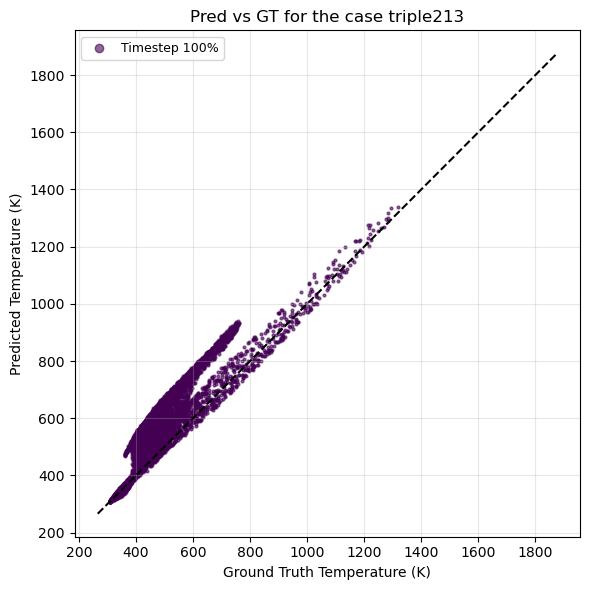

In [53]:
pred = triple123["pred"]
gt = triple123["gt"]
selected_timesteps = [pred.shape[0]-1]
# selected_timesteps = [0, int(pred.shape[0] * 0.25), int(pred.shape[0] * 0.5), int(pred.shape[0] * 0.75), pred.shape[0]-1]
plot_pred_vs_gt_selected(case_name, pred, gt, timesteps=selected_timesteps, cmap='viridis', point_size=4)